In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

Imported the libraries to analyze the data below

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')


uploaded csv data into google colab to bein analysis

In [73]:
print('Shape (rows, columns):', df.shape)

print('\nColumn names:')
print(df.columns)

print('\nData types and non-null counts:')
df.info()

print('\nSummary statistics (numeric columns):')
df.describe()

Shape (rows, columns): (212331, 15)

Column names:
Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Test

,Year,Total Tested
count,"212,331.00","212,331.00"
mean,"2,015.96",49.36
std,0.80,93.02
min,"2,015.00",1.00
25%,"2,015.00",5.00
50%,"2,016.00",20.00
75%,"2,017.00",57.00
max,"2,017.00","1,729.00"


This gives you a quick glimpse/screenshot of the data that will be analyzed. This gives you an idea on what and how you will tackle the data with cleaning, validation, planning and designing as well.


In [49]:
# First 10 rows
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4


Pulled the first 10 pcs of data to get a general overview of what the data looks like and the column set up. You will also get an understanding of the types of values and what they contain/missing data



In [50]:
# Random sample of 5 rows
df.sample(5, random_state=42)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
198472,28Q350,Jamaica Gateway to the Sciences,High school,Physical Settings/Earth Science,2015,45,70.6,11,24.4,34,75.6,11,24.4,na,na
100707,84M353,New Heights Academy Charter School,Secondary School,Geometry,2015,61,54.2,45,73.8,16,26.2,5,8.2,5,8.2
117361,11X509,High School of Language and Innovation,High school,Living Environment,2016,101,58.9,64,63.4,37,36.6,2,2,na,na
42854,22K555,Brooklyn College Academy,High school,Living Environment,2015,18,56.7,15,83.3,3,16.7,1,5.6,na,na
179934,17K590,Medgar Evers College Preparatory School,Secondary School,Physical Settings/Chemistry,2015,3,s,s,s,s,s,s,s,na,na


Pulling random 5 samples verifies that the data is consistent

In [51]:
# Summary statistics for all columns (numeric + non-numeric)
df.describe(include='all')

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,212331,212331,212331,212321,"212,331.00","212,331.00",212331,212331,212331,212331,212331,212331,212331,212331,212331
unique,1018,1012,6,14,NaN,NaN,748,446,992,945,992,744,1000,707,999
top,26Q430,New Visions Charter High School for Advanced Math,High school,Common Core Algebra,NaN,NaN,s,s,s,s,s,s,s,na,na
freq,490,1337,151160,29254,NaN,NaN,75222,75222,75222,75222,75222,75222,75222,142680,142680
mean,NaN,NaN,NaN,NaN,"2,015.96",49.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.80,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,"2,015.00",1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,"2,015.00",5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,"2,016.00",20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,"2,017.00",57.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above step allows me to inspect both numeric and non numeric columns within my data set. This allows me to check how complete the data is and identify any outliers which may skew the data

In [74]:
print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

Percentage of missing values per column:
School DBN                    0.00
School Name                   0.00
School Level                  0.00
Regents Exam                  0.00
Year                          0.00
Total Tested                  0.00
Mean Score                    0.00
Number Scoring Below 65       0.00
Percent Scoring Below 65      0.00
Number Scoring 65 or Above    0.00
Percent Scoring 65 or Above   0.00
Number Scoring 80 or Ab

This allows me to prepare the data for further analysis/exploration. It helps the analyst to determine which columns are worth keeping/cleaning.

In [75]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr'],
      dtype='object')

The above allows me to clean up the column names to ensure accuracy through the column names to make it easier to work with.

In [54]:
# Inspect unique values in mean_score
df['mean_score'].unique()[:10]

array(['s', '77.9', '74', '67.4', '72.6', '64.4', '78.4', '79', '84.8',
       '83.9'], dtype=object)

This allows me to seek for any abnormalities within the data set and shows the distinct values within the columns.



In [82]:
# Replace 'N/A' with actual NaN and convert to numeric
df['mean_score'] = df['mean_score'].replace('N/A', np.nan)
df['mean_score'] = pd.to_numeric(df['mean_score'], errors='coerce')
df['number_scoring_80_or_above'] = pd.to_numeric(df['number_scoring_80_or_above'], errors='coerce')
df[['mean_score', 'number_scoring_80_or_above']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 2 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   mean_score                  137109 non-null  float64
 1   number_scoring_80_or_above  137109 non-null  float64
dtypes: float64(2)
memory usage: 3.2 MB


This step is the begining process of cleaning the data. It replaces any string entries with an actual missing value.

In [83]:
# Check missing values again
df.isna().sum()

,0
school_dbn,0
school_name,0
school_level,0
regents_exam,212331
year,0
total_tested,0
mean_score,75222
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


In [87]:
# Median imputation for mean_score and number_scoring_80_or_above

mean_score_median = df['mean_score'].median()
number_scoring_80_or_above_median = df['number_scoring_80_or_above'].median()
df['mean_score'] = df['mean_score'].fillna(mean_score_median)
df['number_scoring_80_or_above'] = df['number_scoring_80_or_above'].fillna(number_scoring_80_or_above_median)
df['regents_exam'] = df['regents_exam'].median
df.isna().sum()

,0
school_dbn,0
school_name,0
school_level,0
regents_exam,0
year,0
total_tested,0
mean_score,0
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


This step gives me the opportunity to clean and fill missing values from the data set. It allows me to prepare the data for analysis and modeling.

In [44]:

categorical_cols = [ 'school_name', 'school_level', 'regents_exam'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

df[categorical_cols].dtypes


,0
school_name,category
school_level,category
regents_exam,category


In [88]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.describe()

,year,total_tested,mean_score,number_scoring_80_or_above
count,"212,331.00","212,331.00","212,331.00","212,331.00"
mean,"2,015.96",49.36,65.79,15.01
std,0.80,93.02,9.08,45.85
min,"2,015.00",1.00,15.00,0.00
25%,"2,015.00",5.00,62.40,2.00
50%,"2,016.00",20.00,65.40,5.00
75%,"2,017.00",57.00,68.70,9.00
max,"2,017.00","1,729.00",98.70,"1,365.00"


Gives you a general overview of the statistical data/summary within the numerical columns to get an understanding on what scale your data stands. At this point you're able to make sense of your data.


In [90]:
print('mean_score:')
print(df['mean_score'].describe())

print('\nNumber_Scoring_80_or_above:')
print(df['number_scoring_80_or_above'].describe())



mean_score:
count   212,331.00
mean         65.79
std           9.08
min          15.00
25%          62.40
50%          65.40
75%          68.70
max          98.70
Name: mean_score, dtype: float64

Number_Scoring_80_or_above:
count   212,331.00
mean         15.01
std          45.85
min           0.00
25%           2.00
50%           5.00
75%           9.00
max       1,365.00
Name: number_scoring_80_or_above, dtype: float64


An overview regarding the above metrics for the dataset to understand the distribution and school exams


In [92]:
def show_category_distribution(col_name):
    counts = df[col_name].value_counts()
    percents = df[col_name].value_counts(normalize=True) * 100
    display(pd.DataFrame({'count': counts, 'percent': percents.round(2)}))

for col in ['mean_score', 'number_scoring_80_or_above']:
    print(f'--- {col} ---')
    show_category_distribution(col)
    print()

--- mean_score ---


,count,percent
mean_score,,
65.40,75747,35.67
64.30,555,0.26
63.30,555,0.26
62.30,552,0.26
63.80,550,0.26
...,...,...
97.80,1,0.00
98.00,1,0.00
98.70,1,0.00



--- number_scoring_80_or_above ---


,count,percent
number_scoring_80_or_above,,
5.00,80102,37.73
0.00,29996,14.13
1.00,14522,6.84
2.00,9656,4.55
3.00,7434,3.50
...,...,...
778.00,1,0.00
546.00,1,0.00
736.00,1,0.00


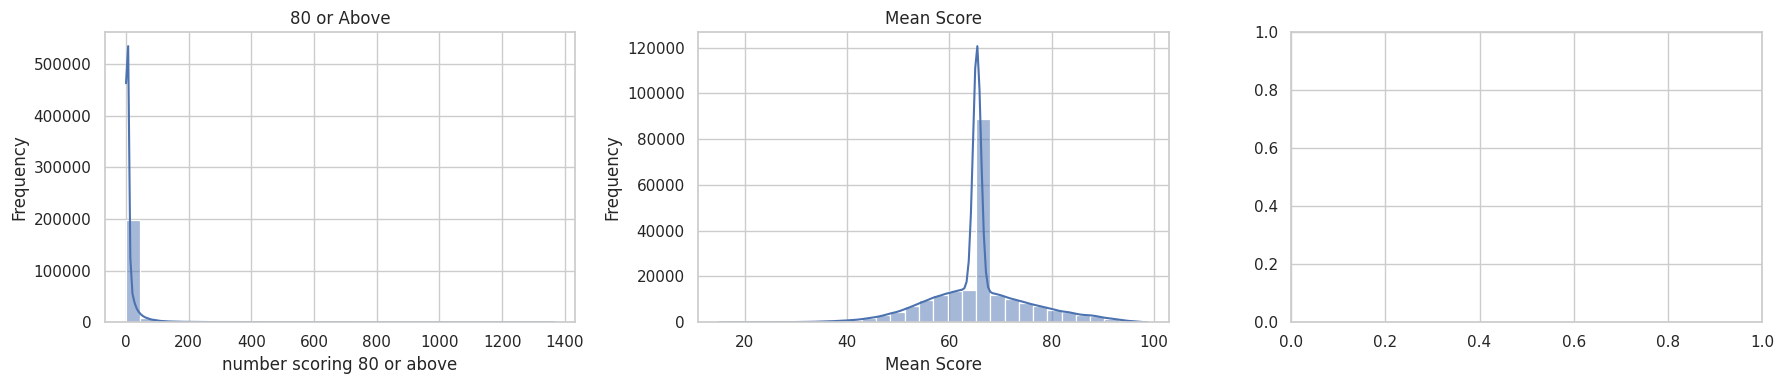

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(df['number_scoring_80_or_above'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('80 or Above')
axes[0].set_xlabel('number scoring 80 or above')
axes[0].set_ylabel('Frequency')

sns.histplot(df['mean_score'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Mean Score')
axes[1].set_xlabel('Mean Score')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

After cleaning the dataset by handling missing values and converting columns to numeric and categorical types, I explored distributions of mean scores and high-achieving students. Results showed that most schools cluster around a mean score of 65, while only a few schools have large numbers of students scoring 80 or above. These findings highlight both consistency in average performance and top achievement across schools.